In [1]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import numpy as np
import os
import json

# 读取json 文件
data_path = os.getcwd()
filename = os.path.join(data_path, 'resultsRecord.json')

with open(filename, 'r') as f:
     data = json.load(f)

# 创建三个numpy 数组分别存放每页阅读时间
book1_pagetime = np.zeros(30)
book2_pagetime = np.zeros(32)
book3_pagetime = np.zeros(147)

# 遍历json 文件，获取每人每本书的阅读时间，并存入numpy 数组
for user_id in range(len(data)):
    for key in data[user_id].keys():
        if key == '1':
            for page_num in data[user_id]["1"].keys():
                page_time = int(data[user_id]["1"][page_num])
                index = int(page_num) - 1
                book1_pagetime[index] += page_time
        elif key == '2':
            for page_num in data[user_id]["2"].keys():
                page_time = int(data[user_id]["2"][page_num])
                index = int(page_num) - 1
                book2_pagetime[index] += page_time
        elif key == '3':
            for page_num in data[user_id]["3"].keys():
                page_time = int(data[user_id]["3"][page_num])
                index = int(page_num) - 1
                book3_pagetime[index] += page_time
        else:
            continue

# 创建一个字典，放三个numpy 数组
pagetime_dict = {"1":book1_pagetime, "2":book2_pagetime, "3":book3_pagetime}

def plot_curve(pagetime_dict, key, i):
    # 设置画布大小
    plt.figure(figsize=(8, 6))
    plt.plot(pagetime_dict[key])

    ax = plt.subplot(1, 1, 1)
    #将x主刻度标签设置为5的倍数 
    xmajorLocator = MultipleLocator(5) 
    ax.xaxis.set_major_locator(xmajorLocator)

    # 设置坐标轴刻度大小
    axis = plt.gca().xaxis
    for label in axis.get_ticklabels():
        label.set_color("black")
        label.set_rotation(45)
        label.set_fontsize(12)

    axis = plt.gca().yaxis
    for label in axis.get_ticklabels():
        label.set_color("black")
        label.set_rotation(0)
        label.set_fontsize(12)

    ax.set_ylabel('Book_{}_total_time'.format(i), fontsize=12)
    ax.set_xlabel('page_num', fontsize=12)

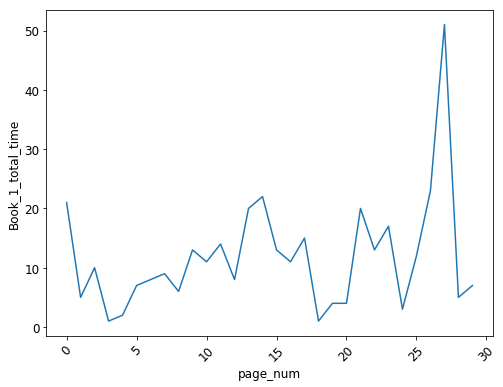

In [7]:
plot_curve(pagetime_dict, key = "1", i = 1)

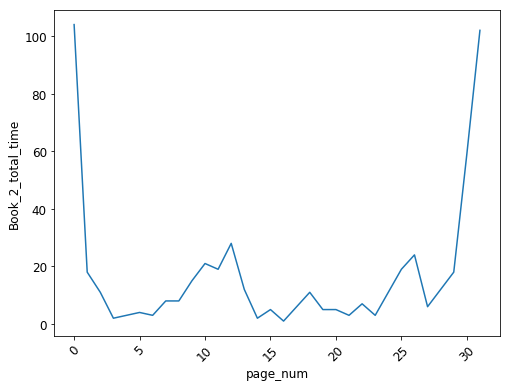

In [8]:
plot_curve(pagetime_dict, key = "2", i = 2)

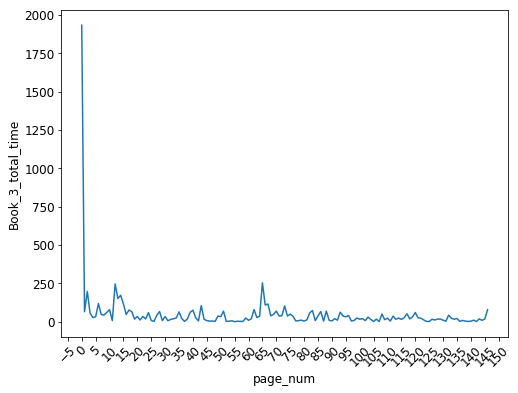

In [9]:
plot_curve(pagetime_dict, key = "3", i = 3)